*We got the dataset from bollow link:
    
dataset link = https://www.kaggle.com/datasets/rahimanshu/cardiomegaly-disease-prediction-using-cnn*

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import os
import warnings
warnings.filterwarnings("ignore")

*Here we import:

1. Libraries such as `numpy`, `tensorflow`, and `ImageDataGenerator` from `tensorflow.keras.preprocessing.image` are imported.
2. A sequential model is initialized using `Sequential()` from `tensorflow.keras.models`.
3. Layers such as Convolutional (`Conv2D`), Max Pooling (`MaxPool2D`), Flatten (`Flatten`), and Fully Connected (`Dense`) are imported from `tensorflow.keras.layers`.
4. `os` module is imported.
5. Warnings are filtered to be ignored.
6. This code appears to set up a convolutional neural network (CNN) for image classification using TensorFlow and Keras. It's likely intended to train a model on image data using data augmentation techniques provided by `ImageDataGenerator`.*

In [3]:
train_dir = r"C:\Users\Aditi\Desktop\Artificial Intelligence Class\Cardiomegaly_Disease_Dataset1\train\train"
test_dir = r"C:\Users\Aditi\Desktop\Artificial Intelligence Class\Cardiomegaly_Disease_Dataset1\test\test"

*Here:

1. `train_dir` is assigned the file path to the directory containing training images.
2. `test_dir` is assigned the file path to the directory containing testing images.
3. The `r` before the string denotes a raw string literal in Python, which is used to avoid interpreting backslashes as escape sequences, ensuring that the file path is interpreted as-is.*

In [4]:
img_width, img_height = 128, 128

*Here:

1. `img_width` and `img_height` are assigned the values of 128 each.
2. These variables likely represent the desired width and height for the images in the dataset, typically used for resizing images to a standard size before feeding them into the neural network model for processing.*

In [5]:
batch_size = 32

*Here:

1. `batch_size` is assigned the value of 32.
2. This variable represents the number of samples to be processed in each batch during training or inference. It is a hyperparameter that affects the efficiency of training and the memory consumption during processing.*

In [6]:
train_dataset = ImageDataGenerator(
    rescale = 1. / 255, 
    rotation_range = 20, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True)

*Here we initializes an `ImageDataGenerator` object for generating batches of augmented training data:

1. `rescale = 1. / 255`: Scales pixel values to the range [0, 1].
2. `rotation_range = 20`: Randomly rotates the images up to 20 degrees.
3. `width_shift_range = 0.2`: Randomly shifts the width of the images by up to 20% of the total width.
4. `height_shift_range = 0.2`: Randomly shifts the height of the images by up to 20% of the total height.
5. `shear_range = 0.2`: Applies shear transformations to the images by up to 20%.
6. `zoom_range = 0.2`: Randomly zooms into the images by up to 20%.
7. `horizontal_flip = True`: Randomly flips the images horizontally.*

In [7]:
test_dataset = ImageDataGenerator(rescale = 1./255)

*Here we initializes an `ImageDataGenerator` object for generating batches of testing data:

1. `rescale = 1./255`: Scales pixel values to the range [0, 1], similar to what was done for the training data. This normalization ensures consistency between the training and testing data, aiding model convergence and performance evaluation. However, unlike the training data generator, there are no additional data augmentation parameters specified, as testing data should remain unchanged for accurate evaluation of model performance.*

In [8]:
x_train = train_dataset.flow_from_directory(
train_dir,
target_size = (img_width,img_height),
batch_size = batch_size,
class_mode = "binary")

Found 4438 images belonging to 2 classes.


*Here we generates batches of augmented training data from images stored in the directory specified by `train_dir`:

1. `train_dataset.flow_from_directory`: This method creates a directory iterator for loading images from the specified directory and its subdirectories.
2. `train_dir`: The directory containing the training images.
3. `target_size = (img_width, img_height)`: Resizes the images to the specified dimensions `(img_width, img_height)`.
4. `batch_size = batch_size`: Sets the batch size to `batch_size`, which was previously defined.
5. `class_mode = "binary"`: Specifies the type of labels returned by the generator. In this case, it's set to `"binary"` indicating binary classification, meaning there are two classes (e.g., positive and negative) represented by the images.

Here we Found 4438 images belonging to 2 classes.*

In [9]:
x_test = test_dataset.flow_from_directory(
test_dir,
target_size = (img_width,img_height),
batch_size = batch_size,
class_mode = "binary")

Found 1114 images belonging to 2 classes.


*Here we generates batches of testing data from images stored in the directory specified by `test_dir`:

1. `test_dataset.flow_from_directory`: This method creates a directory iterator for loading images from the specified directory and its subdirectories.
2. `test_dir`: The directory containing the testing images.
3. `target_size = (img_width, img_height)`: Resizes the images to the specified dimensions `(img_width, img_height)`.
4. `batch_size = batch_size`: Sets the batch size to `batch_size`, which was previously defined.
5. `class_mode = "binary"`: Specifies the type of labels returned by the generator. In this case, it's set to `"binary"`, indicating binary classification, implying there are two classes represented by the images.
Here we Found 1114 images belonging to 2 classes.*

In [10]:
model = Sequential([
    Conv2D(32,(3,3), activation = "relu", input_shape = (img_width, img_height,3)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation = "relu"),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation = "relu"),
    MaxPool2D((2,2)),
    Conv2D(256,(3,3),activation = "relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation = "relu"),
    Dense(256,activation = "relu"),
    Dense(1,activation = "sigmoid")
])

*Here we defines a convolutional neural network (CNN) model using the Sequential API in Keras/TensorFlow:

1. `Conv2D`: Defines a convolutional layer with 32 filters, each with a 3x3 kernel, using the ReLU activation function. The `input_shape` parameter specifies the shape of input images.
2. `MaxPool2D`: Adds a max pooling layer with a 2x2 pool size.
3. This sequence is repeated, gradually increasing the number of filters (64, 128, 256) and reducing the spatial dimensions through max pooling.
4. `Flatten`: Flattens the output from the convolutional layers into a 1D array.
5. `Dense`: Adds fully connected (dense) layers with 512, 256, and 1 neurons respectively, each using ReLU activation except for the last one, which uses the sigmoid activation function. The final layer has 1 neuron, suitable for binary classification tasks (e.g., classifying images into two categories).*

In [11]:
model.compile(optimizer= "adam",loss="binary_crossentropy",metrics=["accuracy"])

*Here compiles the neural network model:

1. `optimizer="adam"`: Specifies the optimization algorithm to be used during training. Here, Adam optimizer is chosen, which is an adaptive learning rate optimization algorithm known for its efficiency and effectiveness in training deep learning models.
  
2. `loss="binary_crossentropy"`: Defines the loss function to be optimized during training. For binary classification tasks like this one, binary crossentropy is commonly used as it measures the difference between the true labels and the predicted probabilities.
  
3. `metrics=["accuracy"]`: Specifies the evaluation metric(s) to be computed during training and testing. In this case, the model's accuracy (the proportion of correctly classified samples) will be monitored.*

In [12]:
history = model.fit(x_train,epochs=30,validation_data=x_test)

Epoch 1/30


139/139 [==============================] - 201s 1s/step - loss: 0.6969 - accuracy: 0.4953 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
139/139 [==============================] - 153s 1s/step - loss: 0.6938 - accuracy: 0.5131 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/30
139/139 [==============================] - 153s 1s/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
139/139 [==============================] - 147s 1s/step - loss: 0.6960 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 5/30
139/139 [==============================] - 147s 1s/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6929 - val_accuracy: 0.5072
Epoch 6/30
139/139 [==============================] - 164s 1s/step - loss: 0.6928 - accuracy: 0.5146 - val_loss: 0.6918 - val_accuracy: 0.5144
Epoch 7/30
139/139 [==============================] - 154s 1s/step - loss: 0.6905 - accuracy: 0.5225 - val_loss: 0.6857 - val_accuracy: 0.51

*Here we trains the neural network model:

1. `model.fit`: Trains the model using the training data (`x_train`) and corresponding labels.
  
2. `epochs=30`: Specifies the number of epochs, i.e., the number of times the entire training dataset is passed forward and backward through the neural network.
  
3. `validation_data=x_test`: Specifies the validation dataset to evaluate the model's performance after each epoch. In this case, the testing data (`x_test`) is used for validation.

The training process updates the model's parameters (weights and biases) iteratively to minimize the defined loss function (binary crossentropy) using the specified optimizer (Adam). The training progress and performance metrics are stored in the `history` variable for later analysis and visualization.*

In [13]:
import matplotlib.pyplot as plt

*Here we imports the `matplotlib.pyplot` module, which is a Python plotting library used for creating various types of visualizations such as line plots, histograms, scatter plots, etc.*

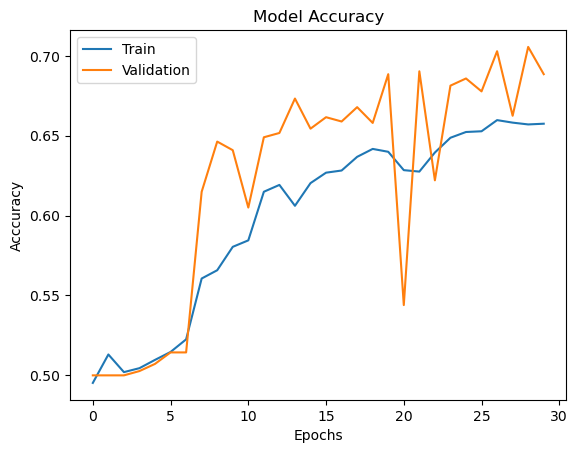

In [14]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acccuracy")
plt.legend(["Train","Validation"])
plt.show()

*Here our a plot showing the training and validation accuracy of a neural network model over epochs:

1. `plt.plot(history.history["accuracy"])`: Plots the training accuracy over epochs using data stored in `history.history["accuracy"]`.
  
2. `plt.plot(history.history["val_accuracy"])`: Plots the validation accuracy over epochs using data stored in `history.history["val_accuracy"]`.
  
3. `plt.title("Model Accuracy")`: Sets the title of the plot to "Model Accuracy".
  
4. `plt.xlabel("Epochs")`: Sets the label for the x-axis to "Epochs".
  
5. `plt.ylabel("Accuracy")`: Sets the label for the y-axis to "Accuracy".
  
6. `plt.legend(["Train", "Validation"])`: Adds a legend to the plot to differentiate between training and validation accuracy curves.
  
7. `plt.show()`: Displays the plot.*

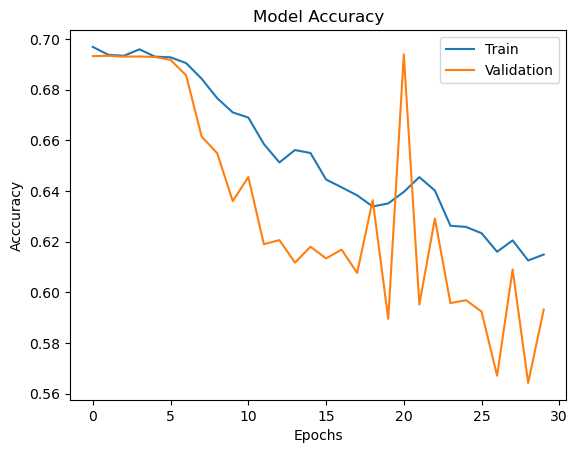

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acccuracy")
plt.legend(["Train","Validation"])
plt.show()

*Here our code generates a plot showing the training and validation loss of a neural network model over epochs:

1. `plt.plot(history.history["loss"])`: Plots the training loss over epochs using data stored in `history.history["loss"]`.

2. `plt.plot(history.history["val_loss"])`: Plots the validation loss over epochs using data stored in `history.history["val_loss"]`.

3. `plt.title("Model Accuracy")`: Sets the title of the plot to "Model Accuracy".

4. `plt.xlabel("Epochs")`: Sets the label for the x-axis to "Epochs".

5. `plt.ylabel("Accuracy")`: Sets the label for the y-axis to "Accuracy".

6. `plt.legend(["Train", "Validation"])`: Adds a legend to the plot to differentiate between training and validation loss curves.

7. `plt.show()`: Displays the plot.*

In [16]:
class_labels = x_train.class_indices

*Here we retrieves the class indices from the training data generator `x_train` and stores them in the `class_labels` variable. These class indices represent the mapping of class labels to numerical indices. For example, if your classes are "cat" and "dog", the class indices might be something like {'cat': 0, 'dog': 1}. This mapping can be useful for tasks such as interpreting model predictions or generating classification reports.*

In [17]:
class_names = {value: key for key, value in class_labels.items()}
print("Class Names : ",class_names)

Class Names :  {0: 'false', 1: 'true'}


*Here we creates a dictionary called `class_names` where the keys are numerical class indices and the values are the corresponding class labels. It achieves this by iterating over the items of the `class_labels` dictionary and swapping the keys and values. 
The `print()` statement then displays the `class_names` dictionary, showing the numerical indices mapped to their respective class labels.*

In [18]:
from tensorflow.keras.preprocessing import image

*Here we imports the `image` module from `tensorflow.keras.preprocessing`, which provides functions for loading and preprocessing images. With this module, you can perform various image-related tasks such as loading images from file paths, resizing images, and applying transformations to images before feeding them into a neural network for prediction or training.*

In [19]:
img_path = r"C:\Users\Aditi\Desktop\img\test1_img.png"

*Here we sets the variable `img_path` to a file path string pointing to an image file named "test1_img.png" located in the specified directory.*

In [20]:
img = image.load_img(img_path, target_size=(img_width,img_height))

*Here we loads the image file specified by the `img_path` variable and resizes it to the dimensions specified by `(img_width, img_height)`. The resulting image is stored in the variable `img`.*

In [21]:
img_arr = image.img_to_array(img)

*Here we converts the image `img` into a NumPy array representation. The resulting array, `img_arr`, will contain the pixel values of the image, allowing it to be processed or fed into a machine learning model for tasks such as classification or object detection.*

In [22]:
img_arr = np.expand_dims(img_arr,axis=0)

*Here we expands the dimensions of the NumPy array `img_arr` along the specified axis (axis=0). By doing so, it creates a new axis at the beginning of the array, effectively converting the array into a batch of one image. This is typically done to match the input shape expected by models, where the first dimension represents the batch size.*

In [23]:
img_arr = img_arr / 255.0

*Here we normalizes the pixel values of the image array `img_arr`. It divides all pixel values by 255.0, which scales them down to the range [0, 1]. Normalization like this is commonly performed to ensure that all features (in this case, pixel values) are on a similar scale, which can aid in the training process and improve convergence of machine learning models.*

In [24]:
pred = model.predict(img_arr)

1/1 [==============================] - 0s 422ms/step


*Here we uses the trained neural network model (`model`) to make predictions on the input image array (`img_arr`). The `predict` method computes the output predictions of the model based on the input data. In this case, `pred` will contain the predicted probabilities for each class, which can be interpreted as the model's confidence in each class.*

In [25]:
pred_class = np.argmax(pred)

*Here we determines the predicted class label from the prediction probabilities (`pred`). It finds the index of the highest probability in the array `pred` using `np.argmax()`, which corresponds to the predicted class. This index represents the class label predicted by the model for the input image.*

In [26]:
class_names[pred_class]

'false'

*Here retrieves the class label associated with the predicted class index (`pred_class`) from the `class_names` dictionary. It maps the numerical index of the predicted class to its corresponding class label, providing the human-readable interpretation of the model's prediction for the input image.
Here we got the correct result.*